<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/Getting_Started_DL_using_TF_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started With Deep Learning Using TensorFlow Keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# An Activation Function


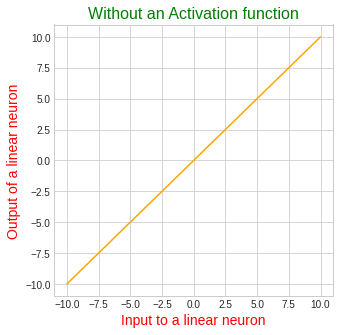

In [ ]:
plt.figure(figsize=(5,5))
plt.style.use('seaborn-whitegrid')
plt.plot([-10,10],[-10,10], color='orange')
plt.ylim([-11,11])
plt.xlim([-11,11])
plt.xlabel('Input to a linear neuron', size=14, color='red')
plt.ylabel('Output of a linear neuron', size=14, color='red')
plt.title('Without an Activation function', color='green', size=16)
plt.show()

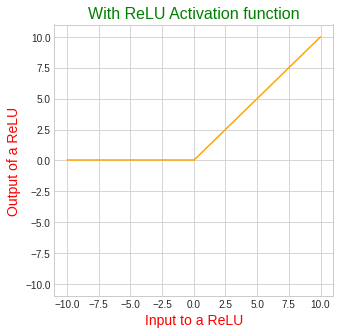

In [ ]:
plt.figure(figsize=(5,5))
plt.style.use('seaborn-whitegrid')
plt.plot([0,10],[0,10], color='orange')
plt.plot([-10,0],[0,0], color='orange')
plt.ylim([-11,11])
plt.xlim([-11,11])
plt.xlabel('Input to a ReLU', size=14, color='red')
plt.ylabel('Output of a ReLU', size=14, color='red')
plt.title('With ReLU Activation function', color='green', size=16)
plt.show()

# A Neural Layer

In [17]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd

In [19]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


### Load data from Colab in-built files

In [22]:
train = pd.read_csv('sample_data/california_housing_train.csv')
test = pd.read_csv('sample_data/california_housing_test.csv')
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [23]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [25]:
train.shape, test.shape

((17000, 9), (3000, 9))

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [28]:
# train features and target
X_train = train.copy()
y_train = X_train.pop('median_house_value')
# test features and target
X_test = test.copy()
y_test = X_test.pop('median_house_value')

### Keras Layer

In [71]:
example = np.array(X_train.iloc[:1,:])
example.shape

(1, 8)

In [70]:
# dense layer 3 units; relu; 8 input features
layer_1 = keras.layers.Dense(3, activation='relu', input_shape=[8])
layer_1(example)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[2252.9033,    0.    ,    0.    ]], dtype=float32)>

In [72]:
print(layer_1(example))

tf.Tensor([[2252.9033    0.        0.    ]], shape=(1, 3), dtype=float32)


In [54]:
layer_1.weights

[<tf.Variable 'dense_1/kernel:0' shape=(8, 3) dtype=float32, numpy=
 array([[-0.00195205,  0.5308593 ,  0.13306755],
        [ 0.22351599, -0.5795231 ,  0.02163208],
        [ 0.08518565,  0.5100978 ,  0.12445992],
        [-0.07514763, -0.08346617,  0.2324968 ],
        [ 0.14699191, -0.26873344,  0.26272577],
        [ 0.17339218,  0.69493574,  0.41784614],
        [ 0.40084606, -0.68343174,  0.45577985],
        [ 0.35693115,  0.23126245,  0.60951596]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [56]:
# dense layer 3 units; no activation; 8 input features
layer_2 = keras.layers.Dense(3, input_shape=[8])
layer_2(example)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 2105.1313, -2763.4834, -3751.6575]], dtype=float32)>

In [74]:
print(layer_2(example))

tf.Tensor([[ 2105.1313 -2763.4834 -3751.6575]], shape=(1, 3), dtype=float32)


In [76]:
layer_2.weights

[<tf.Variable 'dense_6/kernel:0' shape=(8, 3) dtype=float32, numpy=
 array([[-0.58567494,  0.70774144, -0.41588014],
        [-0.44379276, -0.03547895, -0.3841125 ],
        [-0.2969822 , -0.5201839 , -0.49686143],
        [ 0.6745185 , -0.44717604, -0.6295839 ],
        [-0.7203776 ,  0.10507679,  0.20950502],
        [-0.6474074 , -0.6155887 , -0.52024114],
        [-0.30834156,  0.6914132 ,  0.02750236],
        [-0.46015465, -0.23531413,  0.59079   ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

### Neural Network

In [104]:
regressor = keras.Sequential([
                              # input layer
                              keras.layers.Dense(512, activation='relu', input_shape=[8]),
                              # 3 hidden layers
                              keras.layers.Dense(512, activation='relu'),
                              keras.layers.Dense(512, activation='relu'),
                              keras.layers.Dense(512, activation='relu'),
                              # output layer
                              keras.layers.Dense(1)
])

In [79]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               4608      
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 513       
Total params: 793,089
Trainable params: 793,089
Non-trainable params: 0
_________________________________________________________________


In [82]:
# test the untrained model
regressor.predict(example)

array([[67.403656]], dtype=float32)

In [105]:
regressor.compile(loss='mae', optimizer='adam')

### Training a Neural Network

In [90]:
from sklearn.preprocessing  import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
X_train[:5]

array([[ 2.619365  , -0.67152023, -1.07967114,  1.36169494,  1.76420407,
        -0.36118401, -0.07599796, -1.25254316],
       [ 2.53956878, -0.57326437, -0.76187201,  2.29660752,  3.23044127,
        -0.26186523, -0.09940441, -1.08148298],
       [ 2.4946834 , -0.90546278, -0.92077158, -0.88246225, -0.86695622,
        -0.95535424, -0.99925206, -1.17010515],
       [ 2.48969614, -0.92885703, -1.15912093, -0.52418613, -0.48023023,
        -0.79679269, -0.71577404, -0.36260047],
       [ 2.48969614, -0.96160899, -0.68242223, -0.54574692, -0.5063283 ,
        -0.70182999, -0.62214827, -1.02645443]])

In [106]:
history = regressor.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        batch_size=256,
                        epochs=100)

Epoch 1/100
67/67 [==============================] - 2s 28ms/step - loss: 199487.0875 - val_loss: 91205.8984
Epoch 2/100
67/67 [==============================] - 2s 26ms/step - loss: 78261.3172 - val_loss: 59293.5352
Epoch 3/100
67/67 [==============================] - 2s 27ms/step - loss: 56293.4352 - val_loss: 50589.3984
Epoch 4/100
67/67 [==============================] - 2s 26ms/step - loss: 49625.3425 - val_loss: 47164.2188
Epoch 5/100
67/67 [==============================] - 2s 27ms/step - loss: 46193.6056 - val_loss: 46258.2031
Epoch 6/100
67/67 [==============================] - 2s 25ms/step - loss: 46252.8175 - val_loss: 46004.2031
Epoch 7/100
67/67 [==============================] - 2s 27ms/step - loss: 45459.3788 - val_loss: 45472.7734
Epoch 8/100
67/67 [==============================] - 2s 25ms/step - loss: 44171.3856 - val_loss: 44887.4336
Epoch 9/100
67/67 [==============================] - 2s 30ms/step - loss: 44763.8009 - val_loss: 44392.5703
Epoch 10/100
67/67 [=======

In [107]:
hist = pd.DataFrame(history.history)

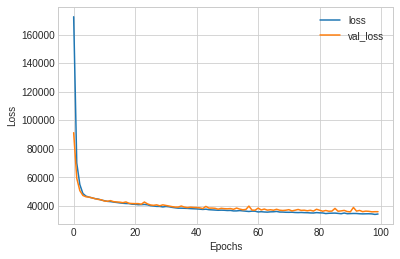

In [108]:
hist.plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

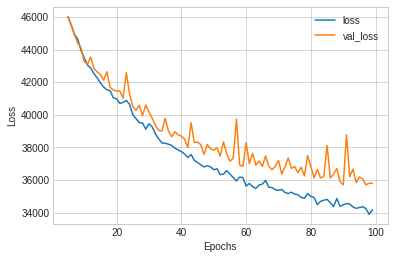

In [113]:
hist.iloc[5:].plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

Thank You for Your Time!